In [1]:
# import library
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [2]:
# loading dataset
df = pd.read_csv("Zhenhao Zong_dataset.csv")

In [3]:
# check the first 5 rwo in the dataset, I have read the overview of the dataset and I know that there are some variables I need
# I need 3 variables and these varibles are latitude, longtitude and diseases respectively.
df.head()

,Id,source,latitude,longitude,region,country,admin1,localityName,localityQuality,observationDate,...,speciesDescription,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansGenderDesc,humansAge,humansAffected,humansDeaths
0,230399,OIE,-27.900000,30.800000,Africa,South Africa,KwaZulu-Natal,HPAI_H5N8_2017_019,Exact,17/08/2017,...,"domestic, unspecified bird",248000.0,12.0,12.0,50000.0,0.0,NaN,0.0,NaN,NaN
1,230381,OIE,54.837037,73.354155,Europe,Russian Federation,Omskaya Oblast,Novaya Stanica,Exact,16/08/2017,...,"domestic, swine",122.0,6.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
2,230333,OIE,-21.077740,30.211620,Africa,Zimbabwe,Masvingo,Mwambe,Exact,16/08/2017,...,"domestic, cattle",1283.0,112.0,0.0,NaN,7.0,NaN,NaN,NaN,NaN
3,230396,OIE,-26.000000,28.300000,Africa,South Africa,Gauteng,HPAI_H5N8_2017_020,Exact,15/08/2017,...,"wild, unspecified bird",NaN,1.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN
4,230371,OIE,49.237900,17.700200,Europe,Czech Republic,Jihomoravsky,Hvozdná,Exact,15/08/2017,...,"wild, wild boar",NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# use this code to find out whethere there are some missing data or not and check baisc statistic details for this dataset.
df.describe()

,Id,latitude,longitude,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansAge,humansAffected,humansDeaths
count,17008.000000,17008.000000,17008.000000,9.757000e+03,14535.000000,14168.000000,13005.000000,12235.000000,1068.000000,1417.000000,451.000000
mean,218823.465075,39.168443,37.774981,7.500692e+03,328.183007,199.190147,3765.857978,100.211443,17.701311,1.017643,0.889135
std,7048.338831,16.817821,41.034310,4.427669e+04,5821.929892,4109.453986,28355.192298,4341.287763,26.932867,0.620142,0.321306
min,206270.000000,-36.856210,-146.490000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,212070.750000,32.090000,11.950000,1.100000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,219591.500000,43.821579,24.511700,9.000000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,224717.250000,48.102805,43.424390,7.160000e+02,5.000000,2.000000,5.000000,0.000000,41.000000,1.000000,1.000000
max,230399.000000,68.392000,144.847374,2.000000e+06,460000.000000,439799.000000,913590.000000,339006.000000,94.000000,24.000000,2.000000


In [5]:
# choose the variable which is disease.
df.disease

0                 Influenza - Avian
1               African swine fever
2            Foot and mouth disease
3                 Influenza - Avian
4               African swine fever
5               African swine fever
6                 Influenza - Avian
7               African swine fever
8                 Newcastle disease
9                 Influenza - Avian
10              African swine fever
11              African swine fever
12              African swine fever
13                Influenza - Avian
14              African swine fever
15               Influenza - Equine
16                Influenza - Avian
17           Foot and mouth disease
18              African swine fever
19              African swine fever
20              African swine fever
21              African swine fever
22              African swine fever
23              African swine fever
24                Influenza - Avian
25                Influenza - Avian
26               Lumpy skin disease
27               Lumpy skin 

In [6]:
# make counts on differet kinds of diseases
df.disease.value_counts()

Influenza - Avian                                6479
Bluetongue                                       3391
African swine fever                              3330
Lumpy skin disease                               2112
MERS-CoV                                          675
Foot and mouth disease                            303
Newcastle disease                                 185
Sheep pox and goat pox                            160
Anthrax                                            65
Peste des petits ruminants                         63
Rift Valley fever                                  51
West Nile Fever                                    49
Rabies                                             36
Equine infectious anaemia                          22
Glanders                                           13
Classical swine fever                              12
African horse sickness                             12
Porcine reproductive and respiratory syndrome      11
Influenza - Equine          

In [7]:
# Check first 5 row diseases and their frequencies
df.disease.value_counts().head()

Influenza - Avian      6479
Bluetongue             3391
African swine fever    3330
Lumpy skin disease     2112
MERS-CoV                675
Name: disease, dtype: int64

In [8]:
# choose top 5 disease and put them in array
usual_diseases = df.disease.value_counts().head().index
print(usual_diseases)

Index(['Influenza - Avian', 'Bluetongue', 'African swine fever',
       'Lumpy skin disease', 'MERS-CoV '],
      dtype='object')


In [9]:
# filter other diseases and keep top 5 disease only and this is for the code in the end
usualdisease_df = df[df['disease'].isin(usual_diseases)]
usualdisease_df.disease.unique()

array(['Influenza - Avian', 'African swine fever', 'Lumpy skin disease',
       'MERS-CoV ', 'Bluetongue'], dtype=object)

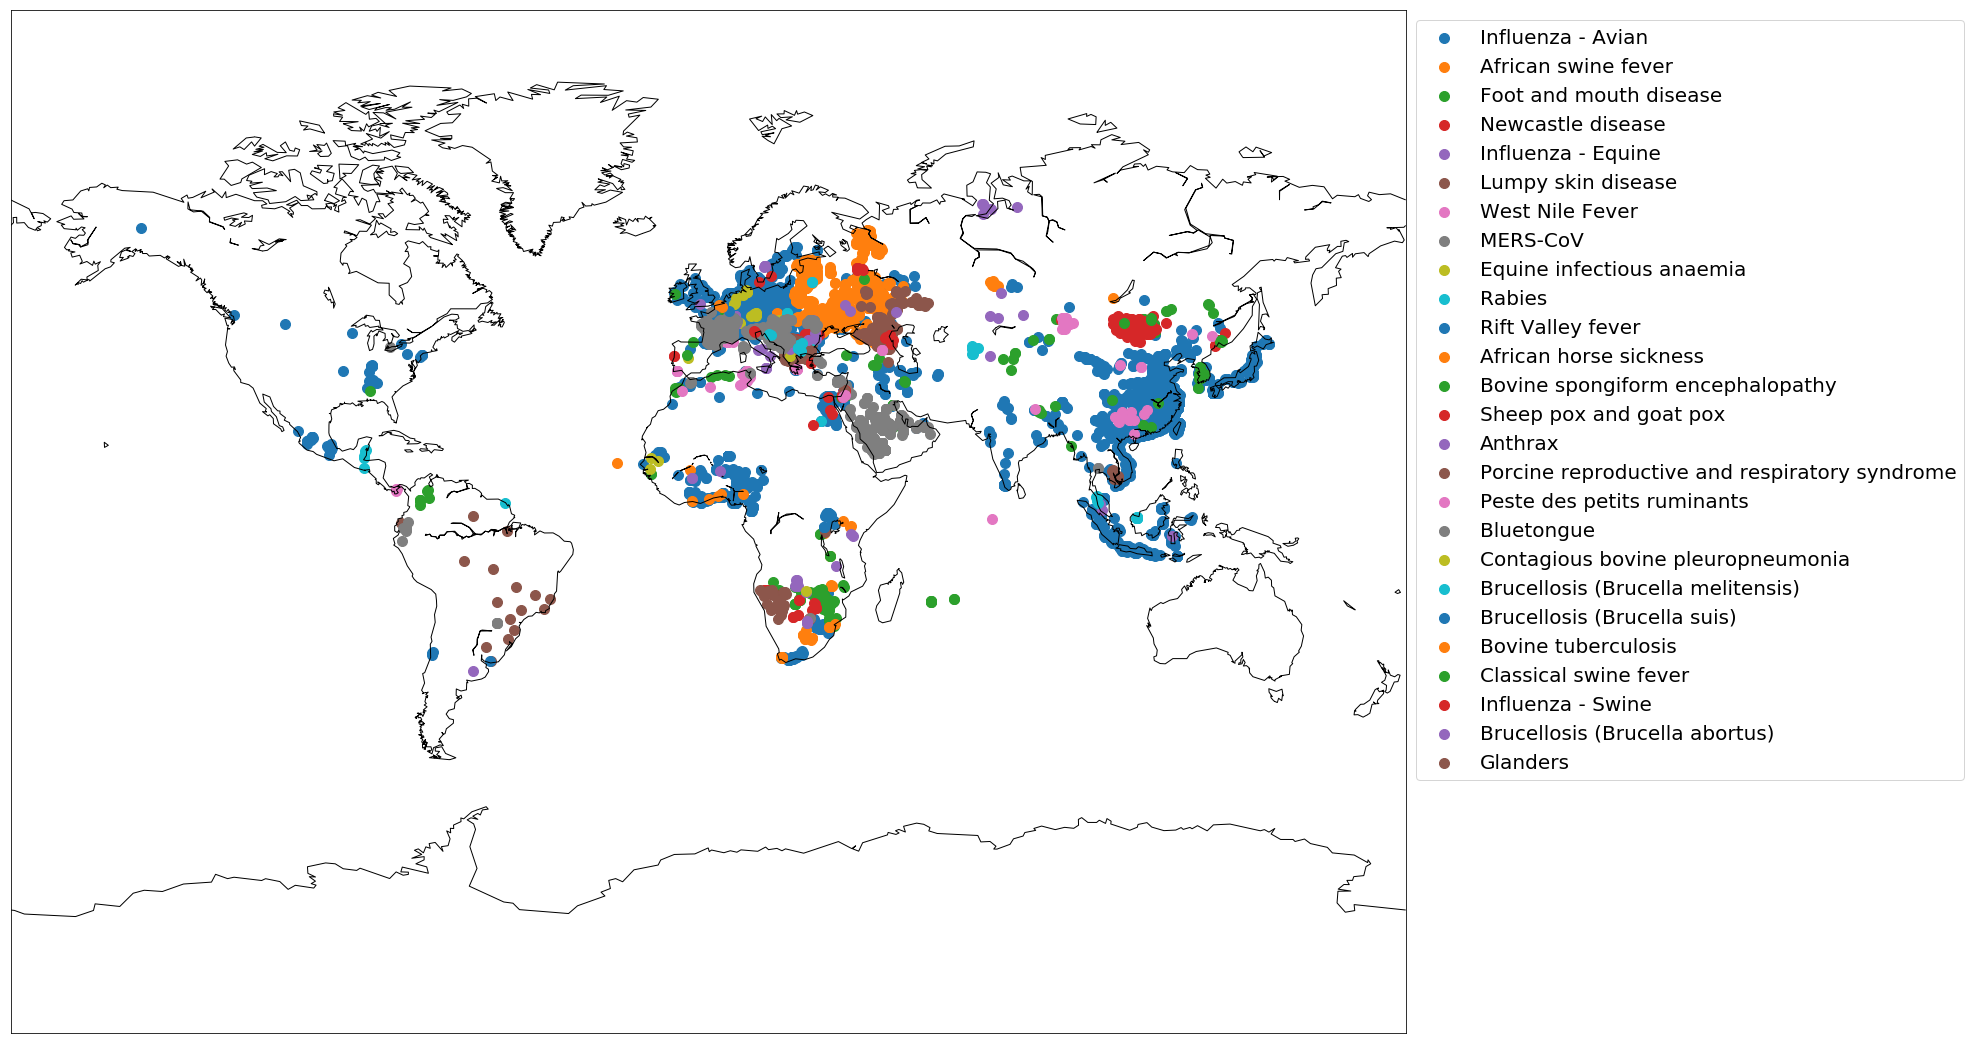

In [10]:
# visualization accodring to the longitude and latitude and diseases in the dataset
plt.figure(figsize=(25,25))
m = Basemap(projection='mill')
m.drawcoastlines()
for disease in df.disease.unique():
    disease_df = df[df.disease == disease]
    x, y = m(list(disease_df['longitude']), list(disease_df['latitude']))
    m.scatter(x, y, s=100, label=disease)
plt.legend(bbox_to_anchor =(1,1), ncol=1,prop = {'size': 20})
plt.show()

In [11]:
# find  out that frequency of top 5 diseases in different continents
print(usualdisease_df.groupby('disease').region.value_counts())

disease              region  
African swine fever  Europe      3295
                     Africa        35
Bluetongue           Europe      3227
                     Asia         142
                     Americas      12
                     Africa        10
Influenza - Avian    Asia        3057
                     Europe      2358
                     Africa       998
                     Americas      66
Lumpy skin disease   Europe      2048
                     Africa        48
                     Asia          16
MERS-CoV             Asia         674
                     Europe         1
Name: region, dtype: int64
